In [4]:
import csv 
from datetime import datetime

def log_time(project_name, action):
    with open ('time_logs.csv', 'a', newline='') as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow([project_name, datetime.now().strftime('%Y-%m-%d %H-%M-%S'), action])

        
def mark_completed(project_name):
    with open ('completed.csv', 'a', newline='') as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow([project_name, datetime.now().strftime('%Y-%m-%d %H-%M-%S')])

def main():
    while True:
        print("1. Clock-In")
        print("2. Clock-Out")
        print("3. Mark Completed")
        print("4. Exit")
        choice = input("Enter Choice:")
        
        if choice =='1':
            project_name=input("Enter Project name: ")
            log_time(project_name, 'clockin')
        elif choice =='2':
            project_name=input("Enter Project name: ")
            log_time(project_name, 'clockout')
        elif choice =='3':
            project_name=input("Enter Project name: ")
            mark_completed(project_name)
        elif choice =='4':
            break
            
if __name__ == "__main__":
    main()

1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:1
Enter Project name: kutta
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:2
Enter Project name: kutta
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:3
Enter Project name: kutta
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:4


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


def generate_gantt_chart():
    
    df = pd.read_csv('time_logs.csv', names=['Project', 'Timestamp', 'Action'])
    print("Original DataFrame:")
    print(df.head())  

   
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    if df['Timestamp'].isnull().any():
        print("Error: Some timestamps could not be converted to datetime.")
        print(df[df['Timestamp'].isnull()]) 
        return

    
    df['Date'] = df['Timestamp'].dt.date
    df = df.sort_values(by=['Project', 'Timestamp'])


    work_times = []
    for project in df['Project'].unique():
        project_data = df[df['Project'] == project]
        clockin_times = project_data[project_data['Action'] == 'clockin']['Timestamp'].reset_index(drop=True)
        clockout_times = project_data[project_data['Action'] == 'clockout']['Timestamp'].reset_index(drop=True)

        for clockin, clockout in zip(clockin_times, clockout_times):
            work_duration = (clockout - clockin).seconds / 3600
            work_times.append({'Project': project, 'Date': clockin.date(), 'Hours': work_duration})

    work_df = pd.DataFrame(work_times)
    print("Work DataFrame:")
    print(work_df.head()) 

    
    fig, ax = plt.subplots(figsize=(10, 6))
    projects = work_df['Project'].unique()
    for project in projects:
        project_data = work_df[work_df['Project'] == project]
        ax.barh(project, project_data['Hours'], left=project_data['Date'].astype('datetime64'))

    ax.set_xlabel('Date')
    ax.set_ylabel('Projects')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()

    
    plt.savefig('gantt_chart.png')
    plt.show()

    print(df.head()) 
    print(work_df.head()) 
if __name__ == "__main__":
    generate_gantt_chart()

Original DataFrame:
  Project            Timestamp    Action
0  python  2024-06-09 13-28-16   clockin
1  python  2024-06-09 13-29-30  clockout
2    bulb  2024-06-09 13-35-50   clockin
3    bulb  2024-06-09 13-35-57  clockout
4   kutta  2024-06-09 13-38-22   clockin


AttributeError: Can only use .dt accessor with datetimelike values

1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:1
Enter Project name: helloo
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:2
Enter Project name: helloo
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:3
Enter Project name: helloo
1. Clock-In
2. Clock-Out
3. Mark Completed
4. Exit
Enter Choice:4
Original DataFrame:
  Project            Timestamp    Action
0  helloo  2024-06-09 13:54:59   clockin
1  helloo  2024-06-09 14:07:30  clockout
DataFrame after datetime conversion:
  Project           Timestamp    Action
0  helloo 2024-06-09 13:54:59   clockin
1  helloo 2024-06-09 14:07:30  clockout
Work DataFrame:
  Project        Date     Hours
0  helloo  2024-06-09  0.208611


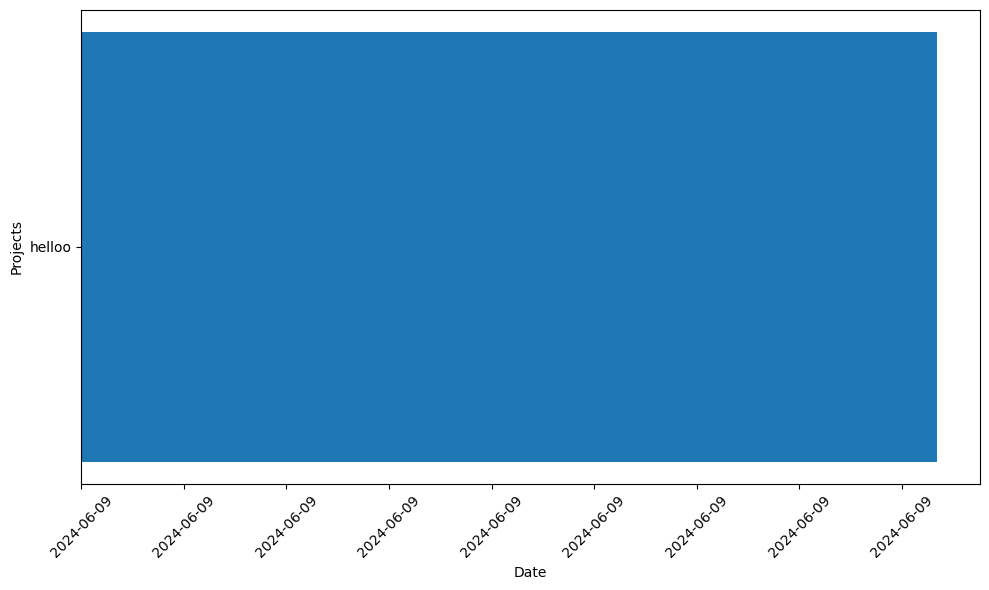

  Project           Timestamp    Action        Date
0  helloo 2024-06-09 13:54:59   clockin  2024-06-09
1  helloo 2024-06-09 14:07:30  clockout  2024-06-09
  Project        Date     Hours
0  helloo  2024-06-09  0.208611


In [8]:
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def log_time(project_name, action):
    with open('time_logs.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([project_name, datetime.now().strftime('%Y-%m-%d %H:%M:%S'), action])

def mark_completed(project_name):
    with open('completed.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([project_name, datetime.now().strftime('%Y-%m-%d %H:%M:%S')])

def main():
    while True:
        print("1. Clock-In")
        print("2. Clock-Out")
        print("3. Mark Completed")
        print("4. Exit")
        choice = input("Enter Choice:")
        
        if choice == '1':
            project_name = input("Enter Project name: ")
            log_time(project_name, 'clockin')
        elif choice == '2':
            project_name = input("Enter Project name: ")
            log_time(project_name, 'clockout')
        elif choice == '3':
            project_name = input("Enter Project name: ")
            mark_completed(project_name)
        elif choice == '4':
            break

if __name__ == "__main__":
    main()

def generate_gantt_chart():
    
    df = pd.read_csv('time_logs.csv', names=['Project', 'Timestamp', 'Action'])
    print("Original DataFrame:")
    print(df.head())  

   
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    print("DataFrame after datetime conversion:")
    print(df.head())  

    if df['Timestamp'].isnull().any():
        print("Error: Some timestamps could not be converted to datetime.")
        print(df[df['Timestamp'].isnull()])  
        return

    
    df['Date'] = df['Timestamp'].dt.date
    df = df.sort_values(by=['Project', 'Timestamp'])

  
    work_times = []
    for project in df['Project'].unique():
        project_data = df[df['Project'] == project]
        clockin_times = project_data[project_data['Action'] == 'clockin']['Timestamp'].reset_index(drop=True)
        clockout_times = project_data[project_data['Action'] == 'clockout']['Timestamp'].reset_index(drop=True)

        for clockin, clockout in zip(clockin_times, clockout_times):
            work_duration = (clockout - clockin).seconds / 3600
            work_times.append({'Project': project, 'Date': clockin.date(), 'Hours': work_duration})

    work_df = pd.DataFrame(work_times)
    print("Work DataFrame:")
    print(work_df.head()) 

   
    fig, ax = plt.subplots(figsize=(10, 6))
    projects = work_df['Project'].unique()
    for project in projects:
        project_data = work_df[work_df['Project'] == project]
        ax.barh(project, project_data['Hours'], left=project_data['Date'].astype('datetime64'))

    ax.set_xlabel('Date')
    ax.set_ylabel('Projects')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()

   
    plt.savefig('gantt_chart.png')
    plt.show()

    print(df.head())  
    print(work_df.head()) 

if __name__ == "__main__":
    generate_gantt_chart()
